# Data Cleaning and Imputation

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("spam.csv")

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

# Data Cleaning
df = df.drop_duplicates()
df['v2'] = df['v2'].str.strip()
df = df.dropna()
# Save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_spam.csv", index=False)
print(df.head())


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Data Transformation and Feature Engineering

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv("spam.csv")

# Explore the data
print(data.head())

# Data preprocessing
# Remove any missing values
data.dropna(inplace=True)

# Text preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    
    # Tokenization and removing stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

data['v2'] = data['v2'].apply(preprocess_text)

# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(data['v2'])
y = data['v1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mscma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Word Cloud

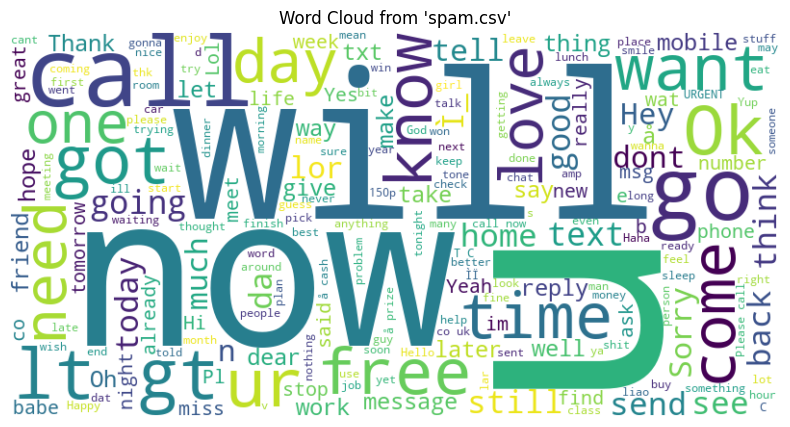

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("cleaned_spam.csv")

# Extract the text data from the 'v2' column
text_data = " ".join(df['v2'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from 'spam.csv'")
plt.show()


#  Data Visualization

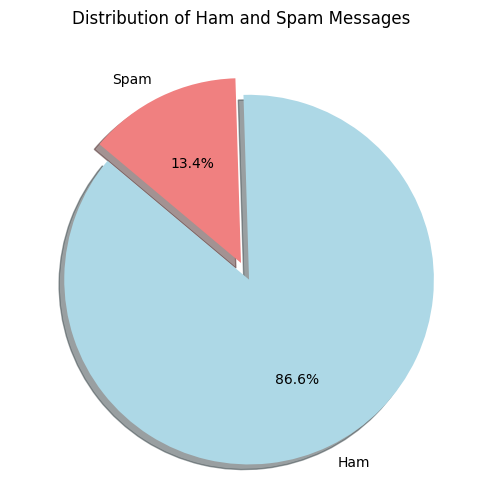

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('spam.csv')

# Count the number of 'ham' and 'spam' messages
ham_count = data[data['v1'] == 'ham'].shape[0]
spam_count = data[data['v1'] == 'spam'].shape[0]

# Create a pie chart to visualize the distribution
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Ham)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Ham and Spam Messages')
plt.show()


C:\Users\mscma\AppData\Local\Temp\ipykernel_14192\2706419715.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


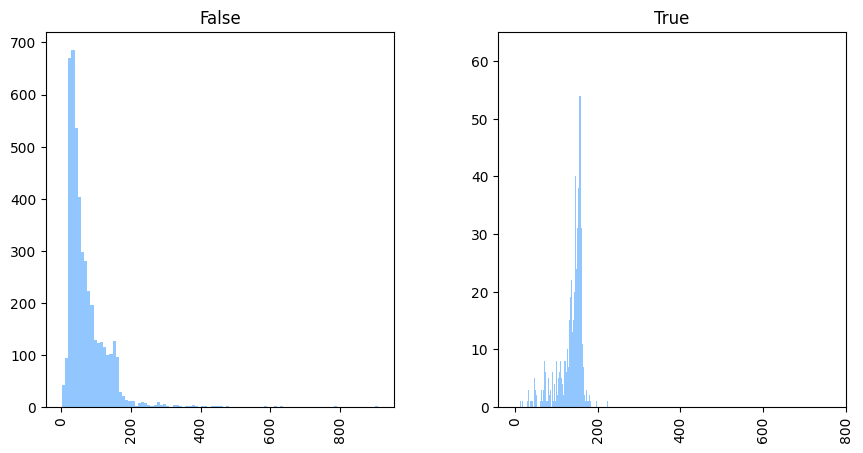

In [17]:
data['length'] = data['v2'].apply(len)
data =pd.get_dummies(data, columns=['v1'], prefix = 'Dummy' ,drop_first = True)
X=data['length'].values[:,None]
y= data['Dummy_spam']
X_train,X_test,y_train,y_test=train_test_split(X,y)
plt.style.use('seaborn-pastel')
data.hist(column='length',by='Dummy_spam',figsize=(10,5), bins=100, label = ("Ham","Spam") )
plt.xlim(-40,800)
plt.ioff()

# Outlier Detection

In [4]:
import pandas as pd
import numpy as np

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("spam.csv")

# Create a function to detect outliers in the text length
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Calculate the text length for each message in 'v2' and add it as a new column
df['text_length'] = df['v2'].apply(len)

# Detect outliers in the text length using the IQR method
outliers = detect_outliers_iqr(df['text_length'])

# Print the rows containing outliers
print(df[outliers])


       v1                                                 v2  text_length
53    ham  Wow. I never realized that you were so embaras...          291
154   ham  You are everywhere dirt, on the floor, the win...          384
380   ham  I guess that's why you re worried. You must kn...          300
472   ham  Nothing. I meant that once the money enters yo...          298
550   ham  Imagine you finally get to sink into that bath...          281
...   ...                                                ...          ...
5209  ham  I know you are thinkin malaria. But relax, chi...          329
5264  ham  Storming msg: Wen u lift d phne, u say \HELLO\...          278
5451  ham  Just sing HU. I think its also important to fi...          251
5535  ham  I know you are thinkin malaria. But relax, chi...          329
5557  ham  No. I meant the calculation is the same. That ...          273

[68 rows x 3 columns]


# Data Quality Monitoring

In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('spam.csv')

# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Count the number of spam and ham messages
spam_count = (df['v1'] == 'spam').sum()
ham_count = (df['v1'] == 'ham').sum()

# Display the results
print("Missing Values:")
print(missing_values)
print("\nNumber of Spam Messages:", spam_count)
print("Number of Ham Messages:", ham_count)

Missing Values:
v1    0
v2    0
dtype: int64

Number of Spam Messages: 747
Number of Ham Messages: 4825


# Natural Language Processing

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline

# Download NLTK data if not already downloaded
nltk.download("punkt")
nltk.download("stopwords")

# Load the CSV data into a pandas DataFrame
df = pd.read_csv("cleaned_spam.csv", names=["label", "text"])

# Preprocessing: Tokenization, Stopword Removal, and Stemming
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenization and convert to lowercase
    filtered_words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]  # Remove stopwords and perform stemming
    return " ".join(filtered_words)

df["text"] = df["text"].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer and train a Naive Bayes classifier
tfidf_vectorizer = TfidfVectorizer()
naive_bayes_classifier = MultinomialNB()

# Create an NLP pipeline
nlp_pipeline = Pipeline([
    ("tfidf", tfidf_vectorizer),
    ("classifier", naive_bayes_classifier)
])

# Train the model
nlp_pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = nlp_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mscma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mscma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9690522243713733
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       906
        spam       1.00      0.75      0.86       128

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



# Testing Multiple Algorithms

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Load the CSV file into a DataFrame
df = pd.read_csv("spam.csv")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer()

# Transform the training and testing text data into TF-IDF vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define a list of models to test
models = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Logistic Regression', LogisticRegression())
]

results = []

for name, model in models:
    wine_model = model
    wine_model.fit(X_train_tfidf, y_train)
    pred = wine_model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average=None)
    recall = recall_score(y_test, pred, average=None)
    error_Rate = 1 - acc
    cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['ham', 'spam'], columns=['ham', 'spam'])
    print('Model tested: {}'.format(name))
    print('Confusion Matrix')
    print(cm)
    print('Accuracy= {}'.format(acc))
    print('Error Rate= {}'.format(error_Rate))
    print('Recall Rate= {}'.format(recall))
    print("Precision Rate: {}".format(precision))
    print(classification_report(y_test, pred))
    print()
    results.append([name, precision])

Model tested: Multinomial Naive Bayes
Confusion Matrix
      ham  spam
ham   965     0
spam   42   108
Accuracy= 0.9623318385650225
Error Rate= 0.03766816143497753
Recall Rate= [1.   0.72]
Precision Rate: [0.95829196 1.        ]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Model tested: Random Forest
Confusion Matrix
      ham  spam
ham   965     0
spam   27   123
Accuracy= 0.9757847533632287
Error Rate= 0.024215246636771326
Recall Rate= [1.   0.82]
Precision Rate: [0.97278226 1.        ]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   ma

# Data Preprocessing Pipelines

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the CSV data
data = pd.read_csv('cleaned_spam.csv')

# Split the data into features (text) and labels (ham or spam)
X = data['v2']
y = data['v1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

# Preprocess the text data
X_train_preprocessed = [preprocess_text(text) for text in X_train]
X_test_preprocessed = [preprocess_text(text) for text in X_test]

# Create a CountVectorizer for text representation
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a classifier (e.g., Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train_encoded)

# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       889
        spam       0.96      0.92      0.94       145

    accuracy                           0.98      1034
   macro avg       0.97      0.96      0.97      1034
weighted avg       0.98      0.98      0.98      1034



# Custom Data Cleaning and Transformation Functions

In [11]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("cleaned_spam.csv")

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

# Data Cleaning and Transformation Functions
def clean_text(text):
    # Remove any leading/trailing whitespace and convert to lowercase
    return text.strip().lower()

# Apply the clean_text function to the 'v2' column (text messages)
df['v2'] = df['v2'].apply(clean_text)

# Filter the DataFrame to separate ham and spam messages
ham_messages = df[df['v1'] == 'ham']
spam_messages = df[df['v1'] == 'spam']

# Display the first few rows of ham and spam messages
print("Cleaned Ham Messages:")
print(ham_messages['v2'].head())

print("\nCleaned Spam Messages:")
print(spam_messages['v2'].head())

# Further data analysis or processing can be done here


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Cleaned Ham Messages:
0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
6    even my brother is not like to speak with me. ...
Name: v2, dtype: object

Cleaned Spam Messages:
2     free entry in 2 a wkly comp to win fa cup fina...
5     freemsg hey there darling it's been 3 week's n...
8     winner!! as a valued network customer you have...
9     had your mobile 11 months or more? u r entitle...
11    six chances to win cash! from 100 to 20,000 po...
Name: v2, dtype: obje

# Report Making

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load the CSV file into a DataFrame
df = pd.read_csv("cleaned_spam.csv")

# Create a ProfileReport object
profile = ProfileReport(df, title="Data Quality Report", explorative=True)

# Generate the report
profile.to_file("data_quality_report(spam).html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]